In [31]:
# Import necessary libraries
import numpy as np
import sep
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.patches import Ellipse

# Set up the display environment for Jupyter
%matplotlib inline



# Step 2: Reading the FITS Image

We will read the test image using `astropy.io.fits` and display it using `matplotlib`.


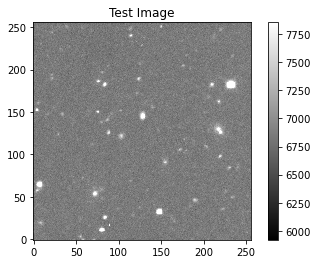

In [32]:
# Load the FITS file
with fits.open('image.fits') as hdul:
    data = hdul[0].data
    # Ensure data is in native byte order
    if data.dtype.byteorder not in ('=', '|'):
        data = data.byteswap().newbyteorder()

# Display the image
m, s = np.mean(data), np.std(data)
plt.figure()
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title('Test Image')
plt.savefig('test_image.png')


# Step 3: Background Subtraction
We will subtract the background to highlight the objects in the image.


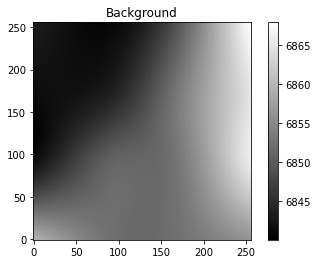

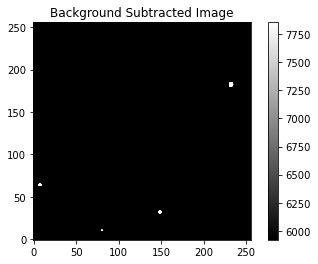

In [33]:
# Perform background subtraction using SEP
bkg = sep.Background(data)

# Display the background
plt.figure()
plt.imshow(bkg, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background')
plt.savefig('background.png')

# Subtract the background
data_sub = data - bkg

# Display the background-subtracted image
plt.figure()
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title('Background Subtracted Image')
plt.savefig('background_subtracted_image.png')


# Step 4: Object Detection
We will now detect objects in the image using the background-subtracted data.


Number of objects detected: 68


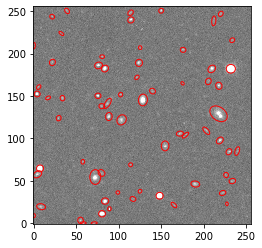

In [34]:
# Detect objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Display detected objects
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('objects_detected.png')

num_objects = len(objects)
print(f'Number of objects detected: {num_objects}')


# Step 5: Aperture Photometry
Next, we perform aperture photometry on the detected objects to measure their properties.


In [35]:
# Define the aperture size and perform aperture photometry
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

# Show the first ten objects with their flux and flux error
for i in range(10):
    print(f"Object {i}: flux = {flux[i]:.2f} +/- {fluxerr[i]:.2f}")


Object 0: flux = 2249.16 +/- 291.03
Object 1: flux = 3092.22 +/- 291.59
Object 2: flux = 5949.87 +/- 356.56
Object 3: flux = 1851.43 +/- 295.03
Object 4: flux = 72736.39 +/- 440.17
Object 5: flux = 3860.76 +/- 352.16
Object 6: flux = 6418.91 +/- 357.46
Object 7: flux = 2210.71 +/- 350.79
Object 8: flux = 2741.61 +/- 352.28
Object 9: flux = 20916.88 +/- 376.97
